P1: Modelado de un vehículo

P2: Segimiento de Caminos

P3: SLAM basado en EFK

P4: Evitar Obstáculos

P5: Planificación de Caminos - Dijkstra

P6: Planificación de Caminos - A*

P7: Navegación Autónoma

<div style="color: red;">

Dudas
    
    
</div>

\newpage


# Modelado de un vehículo diferencial

El modelado de un vehículo con tracción diferencial se puede realizar a partir del modelo de la bicicleta, 
considerando que en este caso particular se dispone de dos ruedas motrices de radio 𝑅, 
separadas entre sí una distancia 2𝐾, 
cada una de las cuales se mueve a una velocidad angular diferente. 

La diferencia de velocidad en ambas ruedas es la que proporcionará la orientación del vehículo en cada instante, 
de manera que el movimiento del vehículo queda modelado a partir de las siguientes expresiones:
$$v = \frac {\omega_i + \omega_d} 2 R \qquad w = \frac {\omega_d-\omega_i } {2 K} R \tag {1.1}$$

donde $v$ y $\omega$ son las velocidades lineal y angular del vehículo, 
mientras que $\omega_i$ y $\omega_d$ son las velocidades angulares de la rueda izquierda y la derecha respectivamente. 

A la hora del modelado de este sistema habrá que considerar que 
las velocidades angulares $\omega_i$ y $\omega_d$ generadas por los actuadores de las ruedas siguen un sistema de primer orden, de manera que:

$$\tau_{\omega i} \cdot \omega_i' = -\omega_i + k_{\omega i} \cdot \omega_{id}
\quad 
    \tau_{\omega d} \cdot \omega_d' = -\omega_d + k_{\omega d} \cdot \omega_{dd} \tag {1.2}$$

donde $\tau_{w i}$ y $\tau_{w d}$ son las constantes de tiempo de cada uno de los actuadores, 
$k_{\omega i}$ y $k_{\omega d}$ ganancias del sistema 
y finalmente $w_{id}$ y $w_{dd}$ serán las velocidades angulares de referencia que se comandan a los actuadores.

Con todo esto, y siguiendo el modelo de la bicicleta, la cinemática del vehículo podría describirse de la
siguiente forma:

$$\Delta s = v \cdot \Delta t \qquad \Delta \Phi = \omega \cdot \Delta t \tag {1.3}$$
$$\Delta x = \cos(\Phi) \cdot \Delta s \qquad \Delta y = \sin(\Phi) \cdot \Delta s \tag {1.4}$$

Se desea simular el movimiento de un vehículo con tracción diferencial con los siguientes parámetros: 
- distancia entre ruedas 0.8 m,
- radio de las ruedas 0.1 m,
- velocidad máxima de las ruedas 15 rad/s.
  
Para ello se tendrán que implantar las ecuaciones de movimiento así como el modelo dinámico simplificado de los dos actuadores. 
Se considerará una constante de tiempo de 0.12 s, ganancia unidad.

\newpage

## Ejercicio

Simular el movimiento en Simulink en tiempo discreto con periodo de T = 25 ms partiendo desde parado y aplicando actuaciones constantes. Considerar las siguientes situaciones: trayectoria recta, giro a la izquierda, giro a la derecha y velocidad lineal nula.  



### Modelado

El propósito de esta práctica es desarrollar el modelo de un vehículo con tracción diferencial utilizando las ecuaciones proporcionadas en el enunciado. Además, se busca simular distintos métodos de seguimiento de trayectoria basados en este modelo.



Los subsistemas a considerar se basan en el modelo de la bicicleta, y son los siguientes:

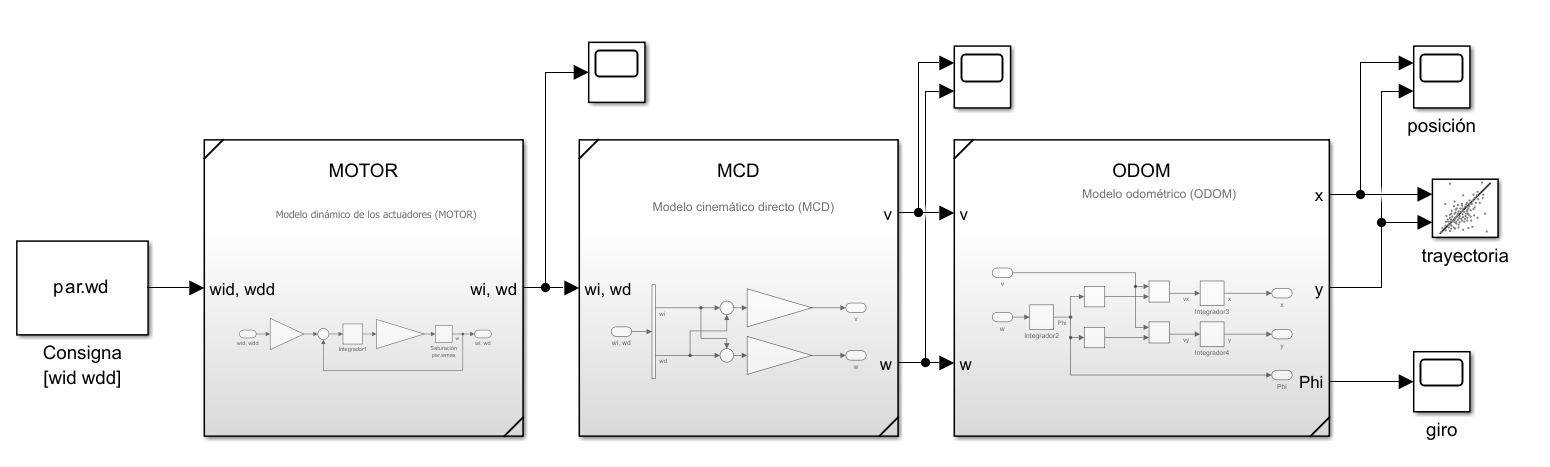


#### Modelo dinámico de actuadores (motores)

Describe la respuesta de los motores ante las consignas de velocidad angular enviadas a las ruedas. Este modelo permite simular el comportamiento real del sistema, considerando su inercia y dinámica.

Simulamos los motores mediante un sistema de primer orden que sigue las ecuaciones (1.2). Como los motores son idénticos, elegimos el motor izquierdo y resolvemos la ecuación:

$$\tau_{\omega i} \cdot \dot \omega_i = -\omega_i + k_{\omega i} \cdot \omega_{id} \implies \dot \omega_i = \frac {- \omega_i +  k_{\omega i} \cdot \omega_{id}} {\tau_{\omega i}} \tag {1.5}$$

Para obtener la velocidad angular en Simulink, integramos la expresión anterior y añadimos un saturador para que se mantenga en los límites de (-15, 15)

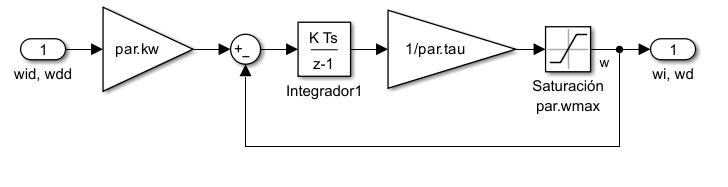

\newpage

#### Modelo Cinemático Directo

Permite obtener la velocidad lineal y angular del vehículo a partir de las velocidades de las ruedas. Estos valores se utilizan posteriormente en el cálculo de la odometría.

Para obtenerlo, implementamos en Simulink las ecuaciones (1.1)

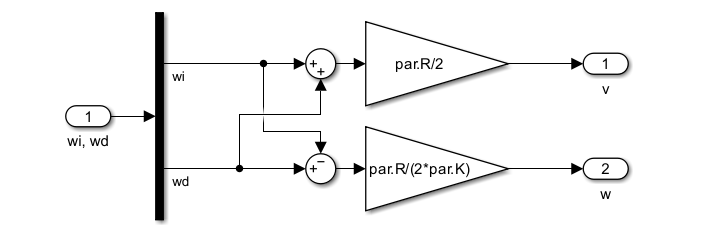

#### Odometría

Con este modelo se determina la posición y orientación del vehículo de manera continua y actualizada, lo que permite un control preciso de su desplazamiento en etapas posteriores.

Implementamos en Simulink las ecuaciones (1.3):

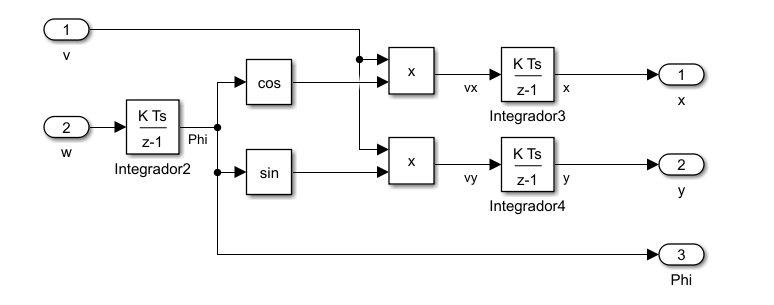

1. Para obtener el ángulo $\Phi$, integramos la velocidad angular:
$$\Phi = \int \omega(t) dt \tag {1.6}$$
2. Para obtener las velocidades lineales de cada rueda, descomponemos utilizando el ángulo: 
$$v_x = v \cos\Phi, \quad v_y = v \sin \Phi \tag{1.7}$$
3. Para obtener el desplazamiento, integramos las velocidades en cada eje: 
$$x = \int v_x(t) dt, \quad y = \int v_y(t) dt \tag {1.8}$$


\newpage

#### Parametrización

**P1param.m**
```
clc;
clear;
close all;
par.kw = [1, 1]; % Ganancia de los motores izquierdo y derecho
par.tau = 0.12; % Constante de tiempo de los motores (segundos)
par.R = 0.1; % Radio de las ruedas (metros)
par.Ts = 0.025; % Tiempo de muestreo (segundos)
par.Tsim = 2;  % Tiempo de simulación (segundos)
par.K = 0.4; % distancia entre ruedas 2K=0.8 => K=0.4
par.wd = [5, 5]; % Consigna de velocidad angular deseada en cada rueda (radianes / segundo)
par.wmax = [-15, 15]; % Velocidad máxima de las ruedas
par.Pose0 = [0; 0; 0]; % Posición inical del robot
addpath('../Subsistemas'); % añade la carpeta de subsistemas al path

```

\newpage

### Resultados


**Línea recta: wid=5, wdd=5**

La figura muestara la trayectoria del vehículo (izquierda) y sus velocidades linear (amarillo) y angular (azul)


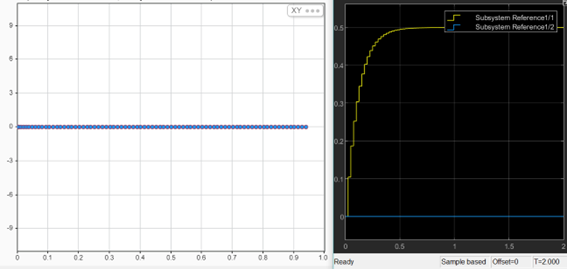

Se puede observar que con una velocidad deseada en ambas ruedas de 5 radianes/segundo el vehículo se mueve a 0.5 m/s: $v=r \cdot \omega=5 0.1 = 0.5$

El resto resultados de simulación se muestran en el ejercicio 2 para facilitar la comparación de resultados.

\newpage

## Ejercicio

Realiza una simulación equivalente en Matlab, realizando el modelo del vehículo íntegramente en un script sin emplear al modelo anterior en Simulink. 

### Implementación

```C++
figure('position', [100 100 1000 400]);
subplot(1, 2, 1);
hold on; grid on; axis equal;
xlabel('Posición X (m)');
ylabel('Posición Y (m)');
title(sprintf("Consignas: wid=%0.1f, wdd=%0.1f", par.wd(1), par.wd(2)));
h_trayectoria = plot(nan, nan, 'b', 'LineWidth', 2);
h_vehiculo = plot(nan, nan, 'ro', 'MarkerSize', 10, 'MarkerFaceColor', 'r');

%% Bucle de simulación
for k = 1:steps -1
    % DISCRETIZACIÓN del modelo de actuadores (Euler hacia adelante)
    omega_i(k+1) = omega_i(k) + par.Ts * par.kw(1) * (par.wd(1)-omega_i(k))/par.tau;
    omega_d(k+1) = omega_d(k) + par.Ts * par.kw(2) * (par.wd(2)-omega_d(k))/par.tau;

    % DISCRETIZACIÓN de la cinemática diferencial
    v = (omega_d(k+1) + omega_i(k+1)) * par.R / 2;
    w = (omega_d(k+1) - omega_i(k+1)) * par.R / (2 * par.K);

    % Actualizar la orientación (discretización de phi)
    phi(k+1) = phi(k) + par.Ts * w;

    % Actualizar la posición (discretización de x e y)
    x(k+1) = x(k) + par.Ts * v * cos(phi(k));
    y(k+1) = y(k) + par.Ts * v * sin(phi(k));
    
    % Actualizar la animación en tiempo real
    set(h_trayectoria, 'XData', x(1:k+1), 'YData', y(1:k+1));
    set(h_vehiculo, 'XData', x(k+1), 'YData', y(k+1));
    pause(0.01); % Pausa para visualizar la animación
end

%% Gráfico adicional: evolución de las velocidades
subplot(1,2,2);
plot((0:steps-1) * par.Ts, omega_i, 'r', 'LineWidth', 2); hold on;
plot((0:steps-1) * par.Ts, omega_d, 'b', 'LineWidth', 2);
xlabel('Tiempo (s)');
ylabel('Velocidad angular (rad/s)');
title('Evolución de las velocidades de las ruedas');
legend('\omega_i (izq)', '\omega_d (der)');
grid on;
```

\newpage

### Resultados

A continuación se muestran los resultados de la simulación en Simulink (arriba) y en Matlab (abajo) para facilitar su comparación


**Línea recta: wid=5, wdd=5**

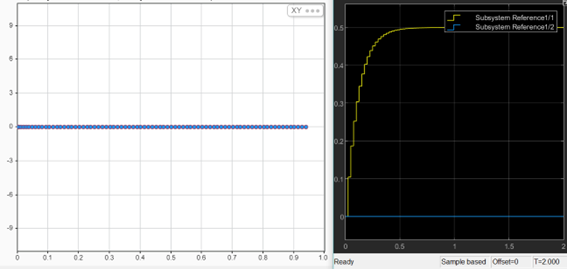

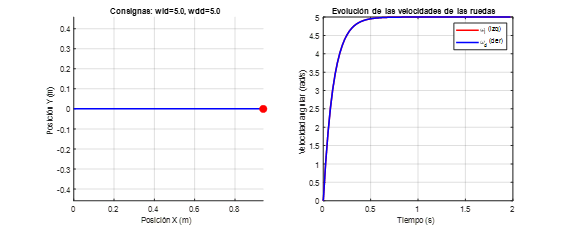



\newpage

**Giro a la izquierda: wid=4, wdd=5**

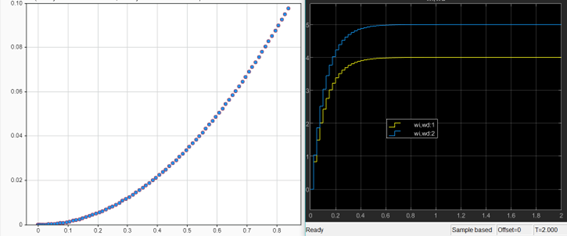

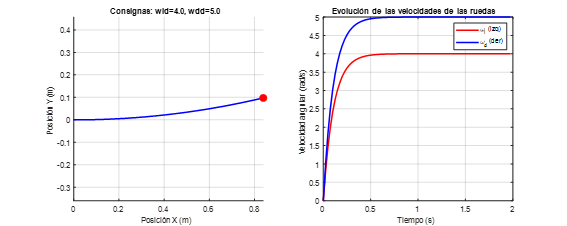



\newpage

**Giro a la derecha: wid=5, wdd=4.5**

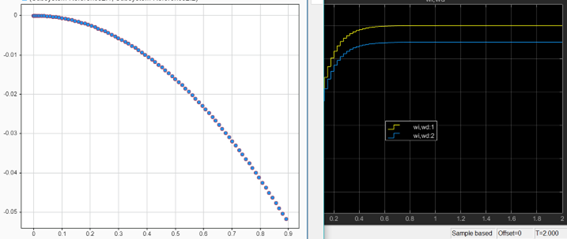

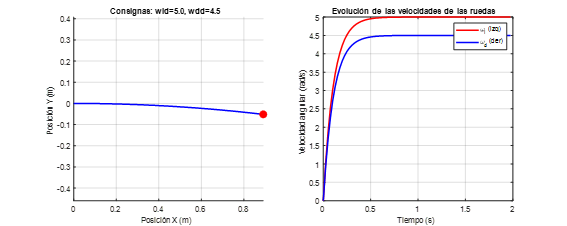



\newpage

**Giro sin desplazamiento: wid=-5, wdd=5**

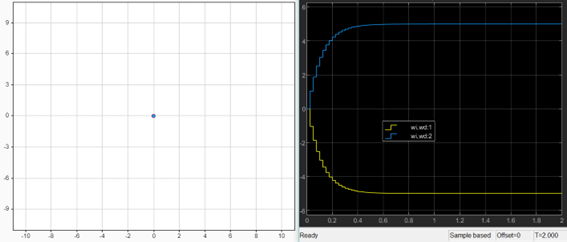

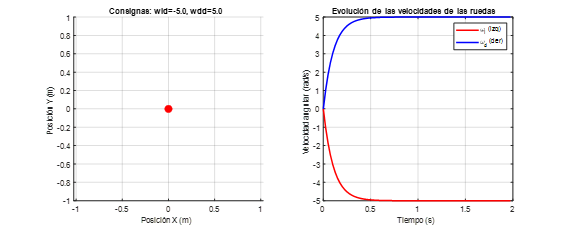



\newpage

## Apéndice: Implementación en Python

La práctica se ha implmentado en Python en dos modalidades:

- Utilizando la biblioteca scipy.signal para procesamiento de señales
- En código nativo Python
  
### Implementación

#### Importación de bibliotecas

In [1]:
import numpy as np
from scipy.signal import TransferFunction, cont2discrete
from scipy import signal
from math import pi
import matplotlib.pyplot as plt

#### Parametrización

In [2]:
kw = 1         # ganancia de los motores izquierdo y derecho
tau = 0.12     # (s) constante de tiempo de los motores
Ts = 0.025     # (s) tiempo de muestreo en milisegundos
Tsim = 2       # (s) tiempo de la simulación
wmax = 15      # (rad/s) velocidad máxima de las ruedas
R = 0.1        # (m) radio de las ruedas
K = 0.4        # (m) distancia de la rueda al centro
steps = int(Tsim/Ts)  # (ms) tiempo de la simulación

#### Modelo dinámico

Dependiendo del parámetro bLib (True por defecto), se utiliza la biblioteca signal o se realizan los cálculos de forma nativa

In [3]:
def ModeloDinamico(wd, steps, bLib=True):
    t = np.linspace(0, Tsim, steps)        
    if bLib:
        num, den = ([kw], [tau, 1]) # Coeficientes del numerador y denominador
        Hs = TransferFunction(num, den) # función de transferencia continua
        x = np.ones(steps) # entrada al modelo 
        t, y, _ = signal.lsim(Hs, x, t) #simulación utilizando el modelo
        return(t, wd * y)
    else:        
        w = np.zeros(steps)
        for i in range(1, steps):
            w[i] =            w[i-1]   + Ts *   kw *  (wd-w[i-1])/tau
        return(t, w)

\newpage

#### Modelo cinemático

In [4]:
def ModeloCinematicoDirecto(wi, wd, R, K):
    v = R*(wi+wd)/2
    w = R*(wd-wi)/(2*K)
    return (v, w)

#### Modelo odométrico

In [5]:
def ModeloOdometrico(v, w):
    Phi = np.cumsum(w) * Ts # integración numérica del ángulo
    vx = v * np.cos(Phi) # extracción de componentes de la velocidad
    vy = v * np.sin(Phi)
    x = np.cumsum(vx) * Ts # integración numérica de la velocidad
    y = np.cumsum(vy) * Ts
    return(x, y, Phi)

#### Visualización de la trayectoria

In [6]:
def MostrarTrayectoria(t, x, y, poses, wi, wd, time_steps, title, scale=10):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)
    ax1.set_title('Posición')
    ax1.set_xlabel('Y')
    ax1.set_ylabel('X')
    
    grados = 180 * poses / pi
    ax1.plot(y, x, label='Position')
    ax1.invert_xaxis()   
    ax1.yaxis.tick_right()
    ax1.yaxis.set_label_position('right')
    ax1.set_title(title)
    ax1.set_xlim(scale, -scale)
    ax1.set_ylim(-scale, scale)
    
    for i in [int(steps/5) * i for i in range(0,5)]:
        ax1.annotate(f't={i*Ts:.2f}, theta={grados[i]:.0f}º', (y[i], x[i]), textcoords="offset points", xytext=(0,10), ha='center')
        ax1.plot(y[i], x[i], 'ro')
    i = steps - 1
    ax1.annotate(f't={i*Ts:.3f}, theta={grados[i]:.0f}º', (y[i], x[i]), textcoords="offset points", xytext=(0,10), ha='center')
    ax1.plot(y[i], x[i], 'ro')
                    
    ax2 = fig.add_subplot(222)
    ax2.plot(t, wi, color='red', label='wi', alpha=0.5)
    ax2.plot(t, wd, color='green', label='wd', alpha=0.5)
    ax2.set_title('Velocidad angular a lo largo del tiempo')
    ax2.set_xlabel('Tiempo')
    ax2.set_ylabel('Velocidad angular')
    ax2.legend()
    
    ax3 = fig.add_subplot(224)
    ax3.plot(t, grados, color='gray')
    ax3.set_title('Orientación a lo largo del tiempo')
    ax3.set_xlabel('Tiempo')
    ax3.set_ylabel('Grados')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    for ax in [ax1, ax2, ax3]:
        ax.grid(True)
    plt.show()
 

#### Integración de modelos

In [7]:
def ModeloCompleto(wid, wdd, bLib=True, scale=10):
    title = "Trayectoria con wid={} y wdd={}".format(wid, wdd)
    t, wi = ModeloDinamico(wid, steps, bLib)
    t, wd = ModeloDinamico(wdd, steps, bLib)
    v, w = ModeloCinematicoDirecto(wi, wd, R, K)
    x, y, Phi = ModeloOdometrico(v, w)
    MostrarTrayectoria(t, x, y, Phi, wi, wd, t, title, scale)

\newpage

### Pruebas

#### Línea recta utilizando biblioteca signal

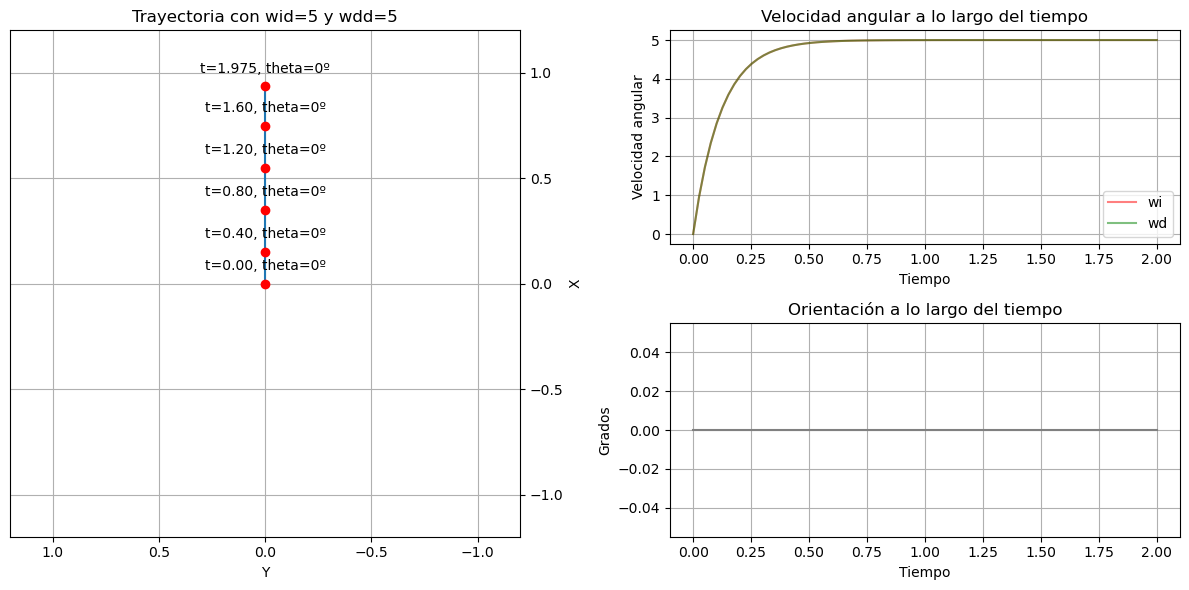

In [8]:
ModeloCompleto(5,5, scale=1.2, bLib=True)

#### Línea recta utilizando código nativo

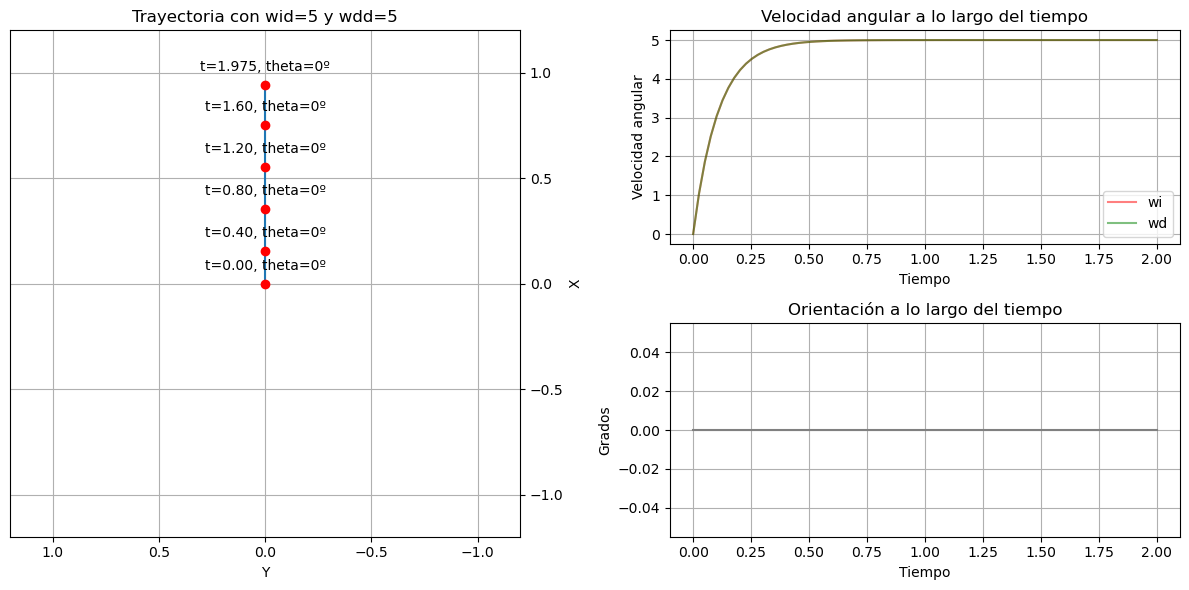

In [9]:
ModeloCompleto(5,5, scale=1.2, bLib=False)

\newpage

#### Curva a la izquierda con código nativo

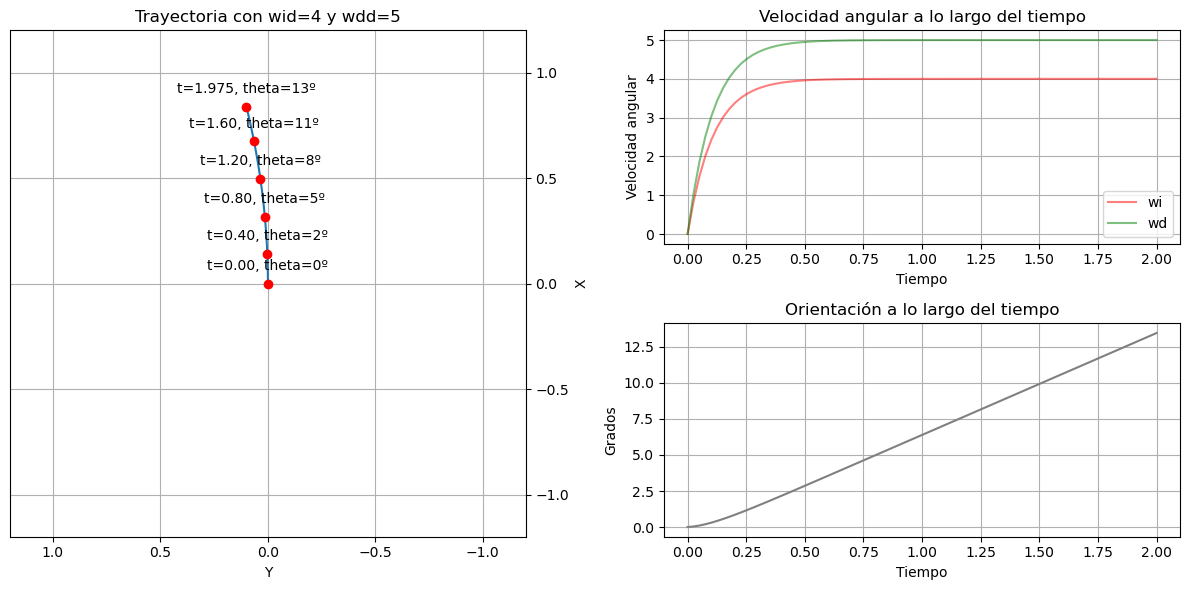

In [10]:
ModeloCompleto(4,5, scale=1.2, bLib=False)

#### Curva a la derecha con código nativo

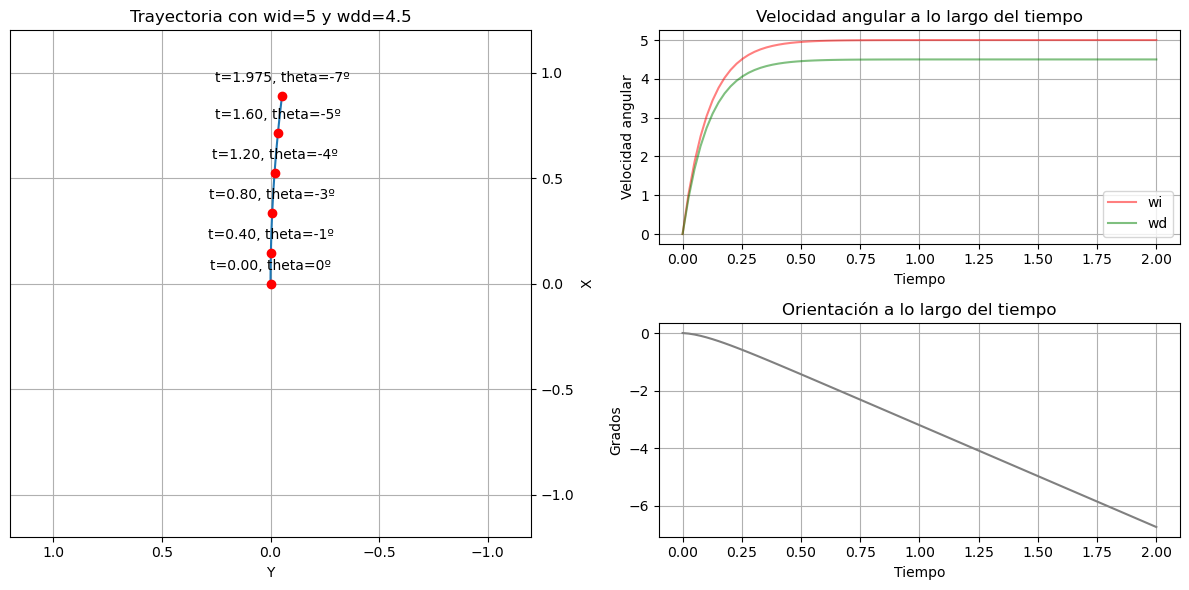

In [11]:
ModeloCompleto(5,4.5, scale=1.2, bLib=False)

\newpage

#### Giro sin desplazamiento utilizando código nativo

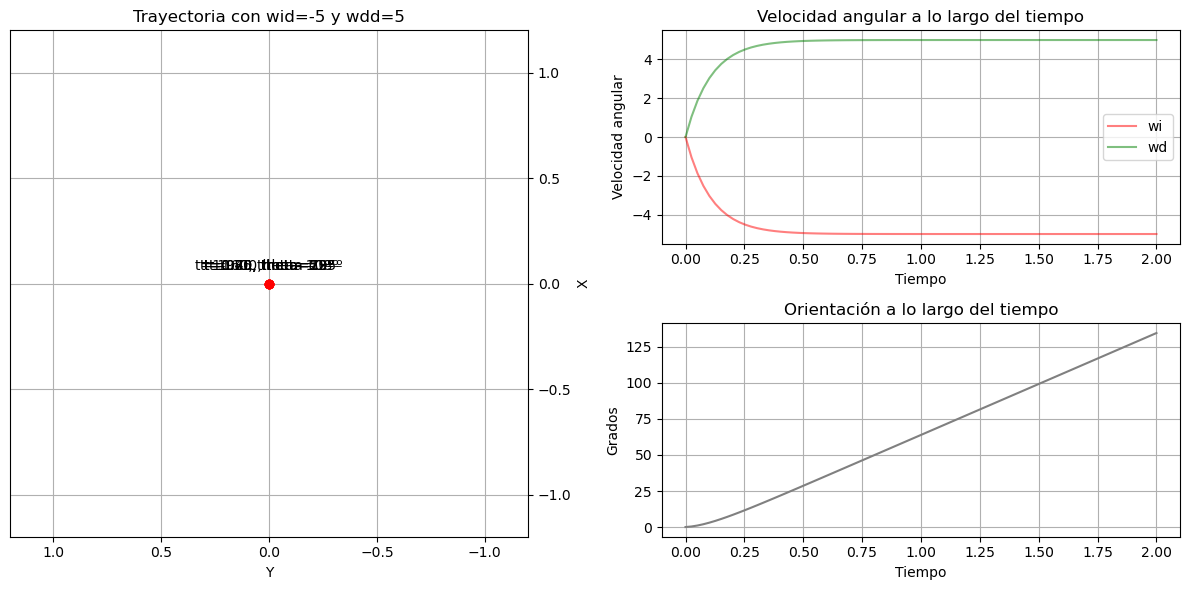

In [12]:
ModeloCompleto(-5,5, scale=1.2, bLib=False)